# Ayurvedic Prakruti Classification using DNA Sequencing with Machine Learning

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [88]:
dataset = pd.read_csv('Dataset.csv')

### Shuffling Dataset

In [89]:
dataset = dataset.reindex(np.random.permutation(dataset.index))
dataset.reset_index(inplace=True,drop=True)

### Splitting into dependent and independent variables

In [90]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [91]:
print(x)

[['GATGAACGCTGGCGGCGTGCCTAACACATGCAAGTCGAGCGATTTACTTCGGTAAAGAGCGGCGGACGGGTGAGTAACGCGTGGGTAACCTGCCCTGTACACACGGATAACATACCGAAAGGTATGCTAATACGAGATAACATGCTTTTATCGCATGGTAGAAGTATCAAAGCTCTGGCGGTACAGGATGGACCCGCGTCTGATTAGCTAGTTGGTAAGGTAACGGCATACCAAGGCGACGATCAGTAGCCGACCTGAGAGGGTGATCGGCCACATTGGAACTGAGACACGGTCCAAACTCCTACGGGAGGCAGCAGTGGGGAATATTGCACAATGGGCGAAAGCCTGATGCAGCAACGCCGCGTGAGCGATGAAGGCCTTCGGGTCGTAAAGCTCTGTCCTCAAGGAAGATAATGACGGTACTTGAGGAGGAAGCCCCGGCTAACTACGTGCCAGCAGCCGCGGTAATACGTAGGGGGCTAGCGTTATCCGGAATTACTGGGCGTAAAGGGTGCGTAGGTGGTTTCTTAAGTCAGAGGTGAAAGGCTACGGCTCGACCGTAGTAAGCCTTTGAAACTGGGAAACTTGAAGTTGCAGGAGAGGAGAGTGGAATTCCTAGTGTAGCGGTGAAATGCGTAGATATTAGGAGGAACACCAGTTGCGAAGGCGGCTCTCTGGACTGTAACTGACACTGAGGCACGAAAGCGTGGGGAGCAAACAGGATTAGATACCCGGTAGTCCCTGAGATTGCCAAGGCACACAGGGGATAGG']
 ['GATGAACGCTAGCTACAGGCTTAACACATGCAAGTCGAGGGGCAGCATGACGATAGCTTGCTATTGTTGATGGCGACCGGCGCATGGGTGAGTAACGCGTATCCAACCTGCCCTTGTCCATCGGATAACCCGTCGAAAGGCGGCCTAACACGATATGCAGTTCTCAGCAGGCATCTAACGAGAACGAAATGTGAAGGAGAAGGATGGGGATGCGTCTGAT

In [92]:
print(y)

['Kapha' 'Vata' 'Pitta' ... 'Pitta' 'Vata' 'Vata']


# Label Encoding Dependent Variable (Ayurvedic Prakruti)

In [93]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [94]:
print(y)

[0 2 1 ... 1 2 2]


# Treating DNA sequence as a "language", otherwise known as k-mer counting

### A function to collect all possible overlapping k-mers of a specified length from any sequence string. We will basically apply the k-mers to the complete sequences.

In [95]:
def getKmers(sequence,size = 6):
    return [sequence[x:x+size].lower() for x in range(len(sequence)-size+1)]

## Now we can convert our training data sequences into short overlapping k-mers of length 6

In [96]:
kmerData = []

for i in x:
    kmerData.append(getKmers(str(i)))

In [97]:
print(kmerData[111])

["['gatg", "'gatga", 'gatgaa', 'atgaac', 'tgaacg', 'gaacgc', 'aacgct', 'acgcta', 'cgctag', 'gctagc', 'ctagct', 'tagcta', 'agctac', 'gctaca', 'ctacag', 'tacagg', 'acaggc', 'caggct', 'aggctt', 'ggctta', 'gcttaa', 'cttaac', 'ttaaca', 'taacac', 'aacaca', 'acacat', 'cacatg', 'acatgc', 'catgca', 'atgcaa', 'tgcaag', 'gcaagt', 'caagtc', 'aagtcg', 'agtcga', 'gtcgag', 'tcgagg', 'cgaggg', 'gagggg', 'aggggc', 'ggggca', 'gggcag', 'ggcagc', 'gcagca', 'cagcat', 'agcatg', 'gcatga', 'catgac', 'atgacg', 'tgacga', 'gacgat', 'acgata', 'cgatag', 'gatagc', 'atagct', 'tagctt', 'agcttg', 'gcttgc', 'cttgct', 'ttgcta', 'tgctat', 'gctatt', 'ctattg', 'tattgt', 'attgtt', 'ttgttg', 'tgttga', 'gttgat', 'ttgatg', 'tgatgg', 'gatggc', 'atggcg', 'tggcga', 'ggcgac', 'gcgacc', 'cgaccg', 'gaccgg', 'accggc', 'ccggcg', 'cggcgc', 'ggcgca', 'gcgcac', 'cgcacg', 'gcacgg', 'cacggg', 'acgggt', 'cgggtg', 'gggtga', 'ggtgag', 'gtgagt', 'tgagta', 'gagtaa', 'agtaac', 'gtaacg', 'taacgc', 'aacgcg', 'acgcgt', 'cgcgta', 'gcgtat', 'cgtatc',

In [98]:
text_data = []

for i in range(len(kmerData)):
    text_data.append("");
    for item in kmerData[i]:
        text_data[i] = text_data[i] + ' ' + item
    
for i in range(len(text_data)):
    text_data[i] = text_data[i][9:-8]

In [99]:
print(text_data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Now we will apply the BAG of WORDS using CountVectorizer using Natural Language Processing

In [100]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range = (4,4))
X = cv.fit_transform(text_data)

In [101]:
print(X.shape)

(3003, 51057)


### Checking weather the dataset is balanced or not

<AxesSubplot:>

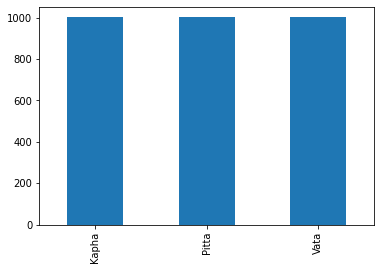

In [102]:
dataset['Prakruti'].value_counts().sort_index().plot.bar()

In [103]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state=42)

In [104]:
print(X_train.shape)
print(X_test.shape)

(2402, 51057)
(601, 51057)


# Creating a multinomial naive Bayes classifier 

In [105]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha = 0.1)
classifier.fit(X_train,y_train)

In [106]:
y_pred = classifier.predict(X_test)

## Checking Accuracy of Modal using some model performce metrics like the confusion matrix, accuracy, precision, recall and f1 score.

In [107]:
from sklearn.metrics import accuracy_score , f1_score , precision_score , recall_score , confusion_matrix, ConfusionMatrixDisplay , RocCurveDisplay 
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test,name="Actual"),pd.Series(y_pred,name="Predicted")))
def get_metrics(y_test,y_predicted):
    accuracy = accuracy_score(y_test,y_predicted)
    precision = precision_score(y_test,y_predicted,average="weighted")
    recall = recall_score(y_test,y_predicted,average="weighted")
    f1 = f1_score(y_test,y_predicted,average="weighted")
    return accuracy , precision,recall,f1
acuracy,precision,recall,f1 = get_metrics(y_test,y_pred)
print("accuracy = %.3f \nprecision =%.3f \nrecall =%.3f \nf1 =%.3f" % (acuracy,precision,recall,f1))

Confusion matrix

Predicted    0    1    2
Actual                  
0          166   25    7
1            0  170   29
2            4   33  167
accuracy = 0.837 
precision =0.848 
recall =0.837 
f1 =0.839


### Plotting Confusion Matrix of multinomial naive bayes classifier

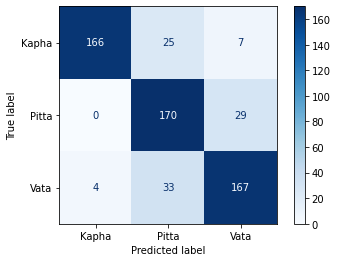

In [108]:
cm = confusion_matrix(y_test,y_pred)
cmp = ConfusionMatrixDisplay(cm,display_labels=['Kapha','Pitta','Vata'])
cmp = cmp.plot(cmap="Blues")
plt.show()

### Traning and validation accuracy of multinomial naive bayes classifier

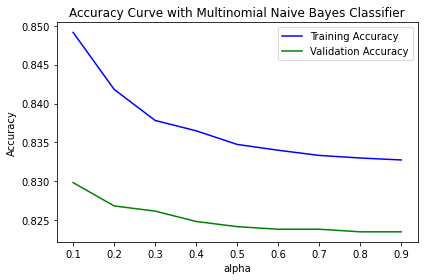

In [146]:
from sklearn.model_selection import validation_curve

parameter_range = np.arange(0.1, 1, 0.1)

train_score, test_score = validation_curve(MultinomialNB(), X, y,
                                       param_name = "alpha",
                                       param_range = parameter_range,
                                        cv = 5, scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Accuracy", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Validation Accuracy", color = 'g')
 
# Creating the plot
plt.title("Accuracy Curve with Multinomial Naive Bayes Classifier")
plt.xlabel("alpha")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show() 

# Creating a k_nearest_neighbors classifier

In [152]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric = 'minkowski',p = 2)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [153]:
y_pred = classifier.predict(X_test)

In [154]:
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test,name="Actual"),pd.Series(y_pred,name="Predicted")))
acuracy,precision,recall,f1 = get_metrics(y_test,y_pred)
print("accuracy = %.3f \nprecision =%.3f \nrecall =%.3f \nf1 =%.3f" % (acuracy,precision,recall,f1))

Confusion matrix

Predicted    0    1    2
Actual                  
0          188    6    4
1            8  189    2
2           11    5  188
accuracy = 0.940 
precision =0.941 
recall =0.940 
f1 =0.940


### Plotting Confusion Matrix of k_nearest_neighbors classifier

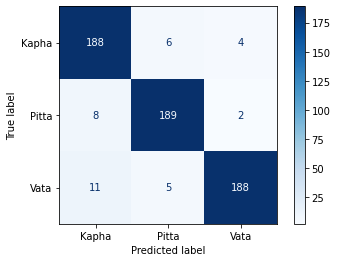

In [155]:
cm = confusion_matrix(y_test,y_pred)
cmp = ConfusionMatrixDisplay(cm,display_labels=['Kapha','Pitta','Vata'])
cmp = cmp.plot(cmap="Blues")
plt.show()

### Traning and validation accuracy of k_nearest_neighbors classifier

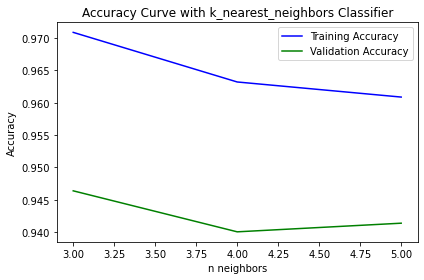

In [157]:
parameter_range = np.arange(3, 6, 1)

train_score, test_score = validation_curve(KNeighborsClassifier(metric = 'minkowski',p = 2), X, y,
                                       param_name = "n_neighbors",
                                       param_range = parameter_range,
                                        cv = 5, scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Accuracy", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Validation Accuracy", color = 'g')
 
# Creating the plot
plt.title("Accuracy Curve with k_nearest_neighbors Classifier")
plt.xlabel("n neighbors")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show() 

###  Creating a support_vector_machine classifier

In [179]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state=0)
classifier.fit(X_train,y_train)

SVC(random_state=0)

In [180]:
y_pred = classifier.predict(X_test)

In [181]:
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test,name="Actual"),pd.Series(y_pred,name="Predicted")))
acuracy,precision,recall,f1 = get_metrics(y_test,y_pred)
print("accuracy = %.3f \nprecision =%.3f \nrecall =%.3f \nf1 =%.3f" % (acuracy,precision,recall,f1))

Confusion matrix

Predicted    0    1    2
Actual                  
0          192    5    1
1            0  197    2
2            5    5  194
accuracy = 0.970 
precision =0.970 
recall =0.970 
f1 =0.970


### Plotting Confusion Matrix of support_vector_machine classifier 

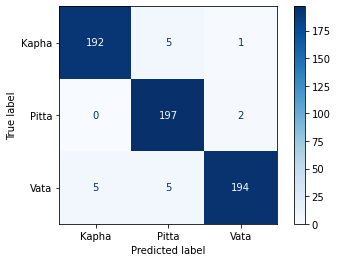

In [182]:
cm = confusion_matrix(y_test,y_pred)
cmp = ConfusionMatrixDisplay(cm,display_labels=['Kapha','Pitta','Vata'])
cmp = cmp.plot(cmap="Blues")
plt.show()

### Traning and validation accuracy of support_vector_machine classifier 

In [ ]:
parameter_range = ["linear", "poly", "rbf"]

train_score, test_score = validation_curve(SVC(random_state=0), X, y,
                                       param_name = "kernel",
                                       param_range = parameter_range,
                                        cv = 5, scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Accuracy", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Validation Accuracy", color = 'g')
 
# Creating the plot
plt.title("Accuracy Curve with support_vector_machine classifier")
plt.xlabel("kernel")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show() 

### Creating a decision_tree classifier

In [164]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy',random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [165]:
y_pred = classifier.predict(X_test)

In [166]:
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test,name="Actual"),pd.Series(y_pred,name="Predicted")))
acuracy,precision,recall,f1 = get_metrics(y_test,y_pred)
print("accuracy = %.3f \nprecision =%.3f \nrecall =%.3f \nf1 =%.3f" % (acuracy,precision,recall,f1))

Confusion matrix

Predicted    0    1    2
Actual                  
0          190    2    6
1            3  184   12
2            7    8  189
accuracy = 0.937 
precision =0.937 
recall =0.937 
f1 =0.937


### Plotting Confusion Matrix of decision_tree classifier

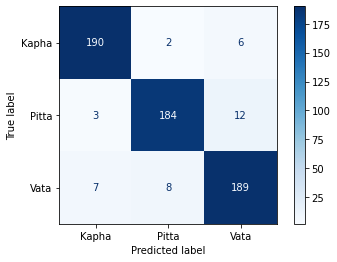

In [170]:
cm = confusion_matrix(y_test,y_pred)
cmp = ConfusionMatrixDisplay(cm,display_labels=['Kapha','Pitta','Vata'])
cmp = cmp.plot(cmap="Blues")
plt.show()

### Traning and validation accuracy of decision_tree classifier

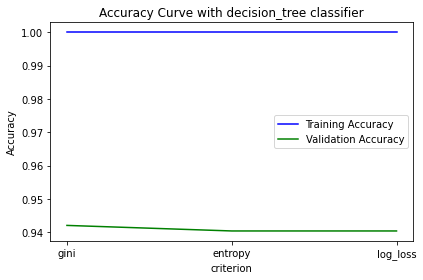

In [173]:
parameter_range = ["gini", "entropy", "log_loss"]

train_score, test_score = validation_curve(DecisionTreeClassifier(random_state=0), X, y,
                                       param_name = "criterion",
                                       param_range = parameter_range,
                                        cv = 5, scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Accuracy", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Validation Accuracy", color = 'g')
 
# Creating the plot
plt.title("Accuracy Curve with decision_tree classifier")
plt.xlabel("criterion")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show() 

### Creating a random_forest classifier 

In [174]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10,criterion = 'entropy',random_state = 0)
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [175]:
y_pred = classifier.predict(X_test)

In [176]:
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test,name="Actual"),pd.Series(y_pred,name="Predicted")))
acuracy,precision,recall,f1 = get_metrics(y_test,y_pred)
print("accuracy = %.3f \nprecision =%.3f \nrecall =%.3f \nf1 =%.3f" % (acuracy,precision,recall,f1))

Confusion matrix

Predicted    0    1    2
Actual                  
0          193    1    4
1            4  194    1
2            8    4  192
accuracy = 0.963 
precision =0.964 
recall =0.963 
f1 =0.963


### Plotting Confusion Matrix of random_forest classifier

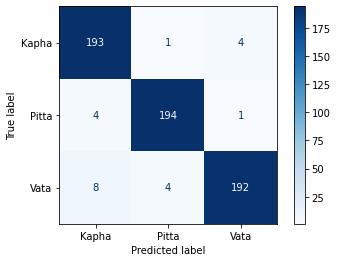

In [177]:
cm = confusion_matrix(y_test,y_pred)
cmp = ConfusionMatrixDisplay(cm,display_labels=['Kapha','Pitta','Vata'])
cmp = cmp.plot(cmap="Blues")
plt.show()

### Traning and validation accuracy of random_forest classifier

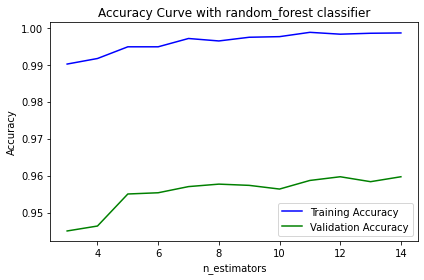

In [178]:
parameter_range = np.arange(3, 15, 1)

train_score, test_score = validation_curve(RandomForestClassifier(criterion = 'entropy',random_state = 0), X, y,
                                       param_name = "n_estimators",
                                       param_range = parameter_range,
                                        cv = 5, scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Accuracy", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Validation Accuracy", color = 'g')
 
# Creating the plot
plt.title("Accuracy Curve with random_forest classifier")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()